In [1]:
!nvidia-smi

Sat Mar 25 12:56:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:03:00.0 Off |                    0 |
| N/A   34C    P0    50W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import os
data_path = '/project/lt900038-ai23tn/kaggle/im_license_plate_recognition/'
os.listdir(data_path)

['1-LPR-950',
 'submission.csv',
 '2-LRP-950',
 'test',
 'test.csv',
 'lp_classes.txt']

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
os.listdir(data_path+"1-LPR-950")

['1-LPR-950']

In [7]:
def read_txt(path):
    f = open(path)
    return f.read().split('\n')

In [10]:
labels = read_txt(data_path+'lp_classes.txt')

In [13]:
from glob import glob

train_img1 = glob(data_path+'1-LPR-950/1-LPR-950/1/*.jpg')
df1 = pd.DataFrame(train_img1, columns=['img_path'])
df1['id'] = df1['img_path'].apply(lambda path: int(path.split('/')[-1].replace('.jpg','')[-5:]))
df1 = df1.sort_values('id')
train_img2 = glob(data_path+'2-LRP-950/2-LRP-950/2/*.jpg')
df2 = pd.DataFrame(train_img2, columns=['img_path'])
df2['id'] = df2['img_path'].apply(lambda path: int(path.split('/')[-1].replace('.jpg','')[-5:]))
df2 = df2.sort_values('id')
img_df = pd.concat([df1, df2]).reset_index(drop=True)

img_df

,img_path,id
0,/project/lt900038-ai23tn/kaggle/im_license_pla...,1
1,/project/lt900038-ai23tn/kaggle/im_license_pla...,2
2,/project/lt900038-ai23tn/kaggle/im_license_pla...,3
3,/project/lt900038-ai23tn/kaggle/im_license_pla...,4
4,/project/lt900038-ai23tn/kaggle/im_license_pla...,5
...,...,...
1966,/project/lt900038-ai23tn/kaggle/im_license_pla...,1996
1967,/project/lt900038-ai23tn/kaggle/im_license_pla...,1997
1968,/project/lt900038-ai23tn/kaggle/im_license_pla...,1998
1969,/project/lt900038-ai23tn/kaggle/im_license_pla...,1999


In [15]:
img_df["img_path"].iloc[0]

'/project/lt900038-ai23tn/kaggle/im_license_plate_recognition/1-LPR-950/1-LPR-950/1/License_00001.jpg'

In [19]:
img_df['id'].unique()

array([   1,    2,    3, ..., 1998, 1999, 2000])

In [20]:
img_df['id'].unique().shape

(1971,)

In [21]:
train_txt1 = glob('/project/lt900038-ai23tn/kaggle/im_license_plate_recognition/1-LPR-950/1-LPR-950/1/labels/*.txt')
train_txt2 = glob('/project/lt900038-ai23tn/kaggle/im_license_plate_recognition/2-LRP-950/2-LRP-950/2/labels/*.txt')

In [22]:
df1 = pd.DataFrame(train_txt1, columns=['labels_path'])
df1['id'] =  df1['labels_path'].apply(lambda path: int(path.split('/')[-1].replace('.txt','')[-5:]))
df1 = df1.sort_values('id').reset_index(drop=True)
df1['labels'] = df1['labels_path'].apply(lambda path: read_txt(path))

df2 = pd.DataFrame(train_txt2, columns=['labels_path'])
df2['id'] =  df2['labels_path'].apply(lambda path: int(path.split('/')[-1].replace('.txt','')[-5:]))
df2 = df2.sort_values('id').reset_index(drop=True)
df2['labels'] = df2['labels_path'].apply(lambda path: read_txt(path))
labels_df = pd.concat([df1, df2])
labels_df['len'] = labels_df['labels'].apply(lambda lis: len(lis))

In [23]:
labels_df

,labels_path,id,labels,len
0,/project/lt900038-ai23tn/kaggle/im_license_pla...,1,"[54 0.489588 0.720586 0.770837 0.411763, 41 0....",8
1,/project/lt900038-ai23tn/kaggle/im_license_pla...,2,"[6 0.16 0.546292 0.133336 0.425925, 4 0.56 0.3...",9
2,/project/lt900038-ai23tn/kaggle/im_license_pla...,3,"[117 0.521123 0.843133 0.323945 0.431366, 10 0...",8
3,/project/lt900038-ai23tn/kaggle/im_license_pla...,4,"[9 0.166674 0.523257 0.157895 0.534888, 5 0.53...",9
4,/project/lt900038-ai23tn/kaggle/im_license_pla...,5,"[41 0.129373 0.387323 0.174827 0.492959, 45 0....",8
...,...,...,...,...
1012,/project/lt900038-ai23tn/kaggle/im_license_pla...,1996,"[81 0.515155 0.656251 0.303027 0.3125, 10 0.19...",8
1013,/project/lt900038-ai23tn/kaggle/im_license_pla...,1997,"[54 0.5 0.666663 0.809529 0.333338, 39 0.20238...",6
1014,/project/lt900038-ai23tn/kaggle/im_license_pla...,1998,"[92 0.484373 0.675674 0.499997 0.324324, 10 0....",8
1015,/project/lt900038-ai23tn/kaggle/im_license_pla...,1999,"[92 0.476555 0.741931 0.515625 0.322585, 10 0....",8


In [66]:
df = img_df.merge(labels_df)
# df = df[df['len']<10]
df = df.drop(columns=['labels','len','id'])

In [67]:
df

,img_path,labels_path
0,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
2,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
3,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
4,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
...,...,...
1946,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1947,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1948,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1949,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...


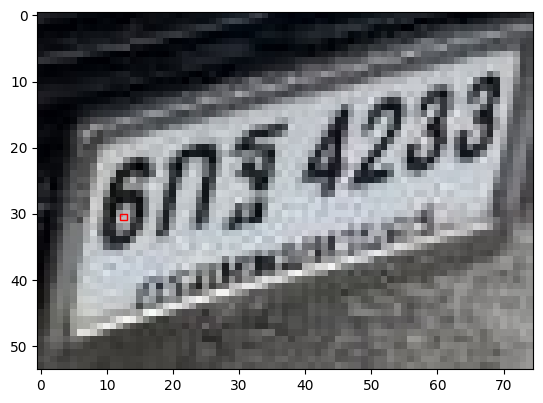

In [68]:
import matplotlib.patches as patches


fig, ax = plt.subplots()
im = plt.imread(df.loc[1,'img_path'])
# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((12, 30), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

### Train test split

In [69]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [70]:
train_df

,img_path,labels_path
535,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1651,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1412,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
926,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1927,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
...,...,...
1130,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1294,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
860,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1459,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...


In [71]:
val_df

,img_path,labels_path
1615,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1406,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1905,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1580,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
307,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
...,...,...
426,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1910,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1646,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...
1601,/project/lt900038-ai23tn/kaggle/im_license_pla...,/project/lt900038-ai23tn/kaggle/im_license_pla...


In [72]:
!rm -r images labels
!mkdir images images/train images/val labels labels/train labels/val

rm: cannot remove 'images': No such file or directory
rm: cannot remove 'labels': No such file or directory


In [73]:
import shutil
from tqdm.notebook import tqdm

def move_files_to_folder(list_of_files, destination_folder):
    for f in tqdm(list_of_files):
        try:
            shutil.copyfile(f, destination_folder+f.split('/')[-1])
        except:
            print(f)
            assert False

# Move the splits into their folders

move_files_to_folder(train_df['img_path'], 'images/train/')
move_files_to_folder(val_df['img_path'], 'images/val/')
# move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_df['labels_path'], 'labels/train/')
move_files_to_folder(val_df['labels_path'], 'labels/val/')
# move_files_to_folder(test_annotations, 'annotations/test/')

  0%|          | 0/1560 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/1560 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

In [74]:
with open("/home/superai023/data.yaml", "w") as f:
  f.write("""train: images/train
val: images/val
nc: 132
names: 
- 0
- 1
- 2
- 3
- 4
- 5
- 6
- 7
- 8
- 9
- 10
- 11
- 12
- 13
- 14
- 15
- 16
- 17
- 18
- 19
- 20
- 21
- 22
- 23
- 24
- 25
- 26
- 27
- 28
- 29
- 30
- 31
- 32
- 33
- 34
- 35
- 36
- 37
- 38
- 39
- 40
- 41
- 42
- 43
- 44
- 45
- 46
- 47
- 48
- 49
- 50
- 51
- 52
- 53
- 54
- 55
- 56
- 57
- 58
- 59
- 60
- 61
- 62
- 63
- 64
- 65
- 66
- 67
- 68
- 69
- 70
- 71
- 72
- 73
- 74
- 75
- 76
- 77
- 78
- 79
- 80
- 81
- 82
- 83
- 84
- 85
- 86
- 87
- 88
- 89
- 90
- 91
- 92
- 93
- 94
- 95
- 96
- 97
- 98
- 99
- 100
- 101
- 102
- 103
- 104
- 105
- 106
- 107
- 108
- 109
- 110
- 111
- 112
- 113
- 114
- 115
- 116
- 117
- 118
- 119
- 120
- 121
- 122
- 123
- 124
- 125
- 126
- 127
- 128
- 129
- 130
- 131
  """)

### Training part

In [75]:
import cv2

In [76]:
!yolo task=detect mode=train model=/home/superai023/ultralytics/ultralytics/models/v8/yolov8.yaml data=/home/superai023/data.yaml epochs=100 imgsz=640

WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295

### Prepare test

In [77]:
test_root = '/project/lt900038-ai23tn/kaggle/im_license_plate_recognition/test/test/'

In [78]:
test_df = pd.read_csv('/project/lt900038-ai23tn/kaggle/im_license_plate_recognition/test.csv')
test_df['path'] = test_root+test_df['image_id']+'.jpg'
test_df.head()

,image_id,x1,y1,x2,y2,path
0,801_9_1445_20191202102441298,333.014354,205.741627,394.497608,238.277512,/project/lt900038-ai23tn/kaggle/im_license_pla...
1,801_9_1_20191202070338305,293.574297,201.867470,358.634538,235.200803,/project/lt900038-ai23tn/kaggle/im_license_pla...
2,801_9_42_20191202071224391,306.425703,204.277108,362.248996,227.168675,/project/lt900038-ai23tn/kaggle/im_license_pla...
3,801_9_68_20191202201851852,332.530120,199.056225,397.991968,228.775100,/project/lt900038-ai23tn/kaggle/im_license_pla...
4,801_9_580_20191202080915065,312.466844,160.477454,378.779841,193.103448,/project/lt900038-ai23tn/kaggle/im_license_pla...


In [79]:
os.makedirs("crop_test/")

FileExistsError: [Errno 17] File exists: 'crop_test/'

In [80]:
for idx in tqdm(range(len(test_df))):
    id = test_df.loc[idx,'image_id']
    path = test_df.loc[idx,'path']
    img = plt.imread(path)
    x1 = int(test_df.loc[idx,'x1'])
    x2 = int(test_df.loc[idx,'x2'])
    y1 = int(test_df.loc[idx,'y1'])
    y2 = int(test_df.loc[idx,'y2'])
    plt.imsave('crop_test/'+id+'.jpg',img[y1:y2,x1:x2])

  0%|          | 0/1991 [00:00<?, ?it/s]

In [81]:
### prediction
!yolo task=detect mode=predict model=/home/superai023/individual_hack/image_pro/runs/detect/train/weights/best.pt conf=0.25 source=crop_test save_txt=True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.11.0+cu113 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)
YOLOv8 summary (fused): 168 layers, 3692756 parameters, 0 gradients, 11.3 GFLOPs

image 1/1990 /lustrefs/disk/home/superai023/individual_hack/image_pro/crop_test/801_9_1001_20191202090204244.jpg: 288x640 1 2, 2 4s, 1 5, 1 7, 2 9s, 1 10, 1 41, 1 54, 11.4ms
image 2/1990 /lustrefs/disk/home/superai023/individual_hack/image_pro/crop_test/801_9_1003_20191202090220065.jpg: 320x640 2 0s, 2 7s, 1 48, 1 53, 1 54, 11.4ms
image 3/1990 /lustrefs/disk/home/superai023/individual_hack/image_pro/crop_test/801_9_1004_20191202090224824.jpg: 320x640 4 6s, 1 16, 1 41, 1 54, 7.0ms
image 4/1990 /lustrefs/disk/home/superai023/individual_hack/image_pro/crop_test/801_9_1007_20191202090300738.jpg: 352x640 2 4s, 2 5s, 1 6, 1 10, 1 52, 1 54, 11.5ms
image 5/1990 /lustrefs/disk/home/superai023/individual_hack/image_pro/crop_test/801_9_1008_20191202090312408.jpg: 288x640 1 0, 1 3, 1 5, 1 9, 1 27, 1 35, 1 54, 7.4ms
ima

In [82]:
import glob
print(f"""
TXT FILES: {len(glob.glob("/home/superai023/individual_hack/image_pro/runs/detect/predict/labels/*.txt"))}
IMG FILES: {len(glob.glob("/content/new_images/*.jpg"))}
""")


TXT FILES: 1989
IMG FILES: 0



### Submit on kaggle

In [83]:
result = pd.read_csv('/project/lt900038-ai23tn/kaggle/im_license_plate_recognition/submission.csv')
result.head()

,image_id,label
0,801_9_1445_20191202102441298,0ฬ-0674
1,801_9_1_20191202070338305,05กฒ4901
2,801_9_42_20191202071224391,1กฉ9661
3,801_9_580_20191202080915065,NaN
4,801_9_646_20191202081630216,NaN


In [84]:
def get_license(txts):
    res = pd.DataFrame([], columns=['label','x_mid','y_mid','w','h'])
    for txt in txts:
        if txt != '':
            res.loc[len(res)] = list(map(float, txt.split()))
    p_idx = res['w'].argmax()
    province = labels[int(res.loc[p_idx,'label'])]
    province = 1 if province=='กรุงเทพมหานคร' else 0
    p_idx = res['w'].argmax()
    province = labels[int(res.loc[p_idx,'label'])]
    province = 0 if province=='กรุงเทพมหานคร' else 1
    res = res.drop(p_idx)
    res = res.sort_values('x_mid')
    res = list(res['label'].apply(lambda num: labels[int(num)]))
    return str(province)+''.join(res)

In [85]:
pred = []
for image_id in tqdm(result['image_id']):
    try:
        txts = read_txt('/home/superai023/individual_hack/image_pro/runs/detect/predict/labels/'+image_id+'.txt')
        pred.append(get_license(txts))
    except:
        pred.append('')
        print('!')

  0%|          | 0/1700 [00:00<?, ?it/s]

In [86]:
pred

['0ม0674',
 '05กฒ4901',
 '1ฉ9661',
 '0ฌธ5479',
 '05กฒ576',
 '06กษ4549',
 '02กย369',
 '0พม73',
 '08กตด8042',
 '0ญร5186',
 '07กก45499',
 '0ฮษ645',
 '05กล8729',
 '05กล5235',
 '03กบ6161',
 '01ฒฉ728',
 '02กดต6678',
 '05กภ88965',
 '13ข7354',
 '07กต6780',
 '0ฆฮ9182',
 '06กม160',
 '0ญฒ618',
 '0ฒม5139',
 '08กผ4767',
 '03กสศ3414',
 '07กทห6998',
 '04กษ5046',
 '0ฎภ794',
 '16ก5160',
 '07กว2105',
 '06กฒ3901',
 '08กตค685',
 '04กค8159',
 '07กร2514',
 '0สณ7507',
 '0ญง3289',
 '05กค4032',
 '05กฮ1715',
 '06กผ2439',
 '0ชขม6046',
 '08กฌณ927',
 '0ศห8668',
 '07กห7884',
 '04กฆ9980',
 '0ญร6103',
 '06กต257',
 '1ง789',
 '0ฉร9955',
 '05กดต6070',
 '03กผ59',
 '0ฎบ1112',
 '06กข9612',
 '05กญ4434',
 '0ศจ1331',
 '06กท9431',
 '01กฒ7030',
 '04กฮ2214',
 '0ญว1717',
 '07กว4361',
 '07กฬ2837',
 '0ขม9447',
 '02ฒท889',
 '08กต374',
 '112704',
 '02กพ5495',
 '08กณ8325',
 '0ญท236',
 '04กขช340',
 '02กข3384',
 '07กศ205',
 '1กท781',
 '01กล2017',
 '02กฎ8587',
 '05กฐ190',
 '03กล4781',
 '08กก694',
 '05กณ5292',
 '15ก5073',
 '1ฉ2466',
 '06ก

In [87]:
result['label'] = pred
result.head()

,image_id,label
0,801_9_1445_20191202102441298,0ม0674
1,801_9_1_20191202070338305,05กฒ4901
2,801_9_42_20191202071224391,1ฉ9661
3,801_9_580_20191202080915065,0ฌธ5479
4,801_9_646_20191202081630216,05กฒ576


In [88]:
result.loc[0,'label'] = '0ฬ-0674'
result.loc[1,'label'] = '05กฒ4901'
result.loc[2,'label'] = '1กฉ9661'
result.head()

,image_id,label
0,801_9_1445_20191202102441298,0ฬ-0674
1,801_9_1_20191202070338305,05กฒ4901
2,801_9_42_20191202071224391,1กฉ9661
3,801_9_580_20191202080915065,0ฌธ5479
4,801_9_646_20191202081630216,05กฒ576


In [89]:
result.to_csv('submission_mhoo.csv', index=False)